In [2]:
# importing libraries
import nltk
nltk.download('punkt')
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/michaelchambers/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df = pd.read_csv('Reddit.csv')
df


,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.800000,1.514981e+09,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.000000,1.493348e+09,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.000000,1.524517e+09,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.500000,1.524018e+09,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.800000,1.516200e+09,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,24271,ptsd,7vavh4,"(0, 5)",i have horrible vivid nightmares every night. ...,1,1.000000,1.517790e+09,7,4.597368,...,1.0000,1.2000,1.0,1.76956,1.46522,1.84112,0.79,15,4.589333,-0.075000
711,2212,relationships,7oeyuc,"[70, 75]",Also I can't think about both of them without ...,1,0.571429,1.515192e+09,0,1.452083,...,1.0000,1.1818,1.0,1.67960,1.51429,1.83530,0.50,7,2.833889,0.189286
712,27951,relationships,7ssxec,"(35, 40)","Furthermore, I told him before we got really s...",1,0.600000,1.516849e+09,3,3.956447,...,1.0000,1.0000,1.0,1.71367,1.50909,1.85501,0.72,10,5.709053,-0.044444
713,1164,assistance,90bila,"[8, 13]",Here's the link to my amazon wish list where t...,0,0.600000,1.532048e+09,18,0.236814,...,1.5000,1.0000,1.0,1.65132,1.53913,1.90766,0.74,2,2.365294,0.090000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Columns: 116 entries, id to sentiment
dtypes: float64(107), int64(5), object(4)
memory usage: 648.1+ KB


In [5]:
df.shape

(715, 116)

In [6]:
df.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,715.000000,715.000000,715.000000,7.150000e+02,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,...,715.000000,715.000000,715.00000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,13861.372028,0.516084,0.717895,1.517570e+09,24.627972,4.705624,85.667133,34.743399,38.410839,69.917413,...,1.081046,1.117715,1.00028,1.723382,1.529951,1.878992,0.856294,8.951049,5.497574,0.045345
std,17765.755427,0.500091,0.325688,1.553944e+07,113.086473,3.244652,31.197320,26.331580,30.834289,31.682491,...,0.107884,0.089972,0.00748,0.048894,0.100724,0.056044,0.174352,12.891993,2.490971,0.194114
min,2.000000,0.000000,0.000000,1.483330e+09,0.000000,-4.800000,12.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.574670,1.281480,1.718540,0.200000,0.000000,-2.318095,-1.000000
25%,848.000000,0.000000,0.600000,1.509572e+09,2.000000,2.584422,65.000000,11.975000,10.340000,46.400000,...,1.000000,1.000000,1.00000,1.692570,1.464260,1.841965,0.765000,2.000000,3.693035,-0.056181
50%,1778.000000,1.000000,0.800000,1.516658e+09,5.000000,4.477286,81.000000,30.370000,30.240000,84.470000,...,1.000000,1.125000,1.00000,1.720660,1.523260,1.878170,0.910000,5.000000,5.327778,0.042460
75%,26201.500000,1.000000,1.000000,1.531001e+09,10.000000,6.723889,101.500000,53.480000,61.580000,96.945000,...,1.125000,1.142900,1.00000,1.753110,1.592570,1.910965,1.000000,11.000000,7.049380,0.154701
max,55783.000000,1.000000,1.000000,1.542583e+09,1687.000000,22.535493,264.000000,98.220000,99.000000,99.000000,...,1.777800,1.777800,1.20000,1.946420,2.040000,2.140430,1.000000,128.000000,18.530103,0.800000


In [7]:
df['subreddit'].nunique()

10

In [8]:
dfunique = df['subreddit'].unique() 

dfunique

array(['relationships', 'anxiety', 'ptsd', 'assistance', 'homeless',
       'almosthomeless', 'domesticviolence', 'survivorsofabuse', 'stress',
       'food_pantry'], dtype=object)

In [9]:
df['id'].nunique()

715

In [10]:
newDF = df.columns[9:113]
df.drop(columns=newDF, inplace=True, axis=1)
df


,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.800000,1.514981e+09,22,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.000000,1.493348e+09,5,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.000000,1.524517e+09,10,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.500000,1.524018e+09,5,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.800000,1.516200e+09,138,70,4.801869,0.141667
...,...,...,...,...,...,...,...,...,...,...,...,...
710,24271,ptsd,7vavh4,"(0, 5)",i have horrible vivid nightmares every night. ...,1,1.000000,1.517790e+09,7,15,4.589333,-0.075000
711,2212,relationships,7oeyuc,"[70, 75]",Also I can't think about both of them without ...,1,0.571429,1.515192e+09,0,7,2.833889,0.189286
712,27951,relationships,7ssxec,"(35, 40)","Furthermore, I told him before we got really s...",1,0.600000,1.516849e+09,3,10,5.709053,-0.044444
713,1164,assistance,90bila,"[8, 13]",Here's the link to my amazon wish list where t...,0,0.600000,1.532048e+09,18,2,2.365294,0.090000


In [11]:
df['Word Count'] = df['text'].apply(lambda x: len(x.split()))
df

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,social_num_comments,syntax_fk_grade,sentiment,Word Count
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.800000,1.514981e+09,22,62,-0.148707,0.000000,55
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.000000,1.493348e+09,5,2,7.398222,-0.065909,71
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.000000,1.524517e+09,10,8,3.149288,-0.036818,147
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.500000,1.524018e+09,5,7,6.606000,-0.066667,100
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.800000,1.516200e+09,138,70,4.801869,0.141667,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,24271,ptsd,7vavh4,"(0, 5)",i have horrible vivid nightmares every night. ...,1,1.000000,1.517790e+09,7,15,4.589333,-0.075000,53
711,2212,relationships,7oeyuc,"[70, 75]",Also I can't think about both of them without ...,1,0.571429,1.515192e+09,0,7,2.833889,0.189286,71
712,27951,relationships,7ssxec,"(35, 40)","Furthermore, I told him before we got really s...",1,0.600000,1.516849e+09,3,10,5.709053,-0.044444,71
713,1164,assistance,90bila,"[8, 13]",Here's the link to my amazon wish list where t...,0,0.600000,1.532048e+09,18,2,2.365294,0.090000,60


In [12]:
# mapped each subreddit to have a number as a representation of it, its the column on the far right
df['subreddit_id'] = df['subreddit'].map({'relationships' : 0, 'anxiety' : 1, 'ptsd' : 2, 'assistance': 3,
                                        'homeless' : 4, 'almosthomeless' : 5, 'domesticviolence': 6, 
                                          'survivorsofabuse' : 7, 'stress' : 8, 'food_pantry': 9, })
df

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,social_num_comments,syntax_fk_grade,sentiment,Word Count,subreddit_id
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.800000,1.514981e+09,22,62,-0.148707,0.000000,55,0
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.000000,1.493348e+09,5,2,7.398222,-0.065909,71,1
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.000000,1.524517e+09,10,8,3.149288,-0.036818,147,2
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.500000,1.524018e+09,5,7,6.606000,-0.066667,100,2
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.800000,1.516200e+09,138,70,4.801869,0.141667,77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,24271,ptsd,7vavh4,"(0, 5)",i have horrible vivid nightmares every night. ...,1,1.000000,1.517790e+09,7,15,4.589333,-0.075000,53,2
711,2212,relationships,7oeyuc,"[70, 75]",Also I can't think about both of them without ...,1,0.571429,1.515192e+09,0,7,2.833889,0.189286,71,0
712,27951,relationships,7ssxec,"(35, 40)","Furthermore, I told him before we got really s...",1,0.600000,1.516849e+09,3,10,5.709053,-0.044444,71,0
713,1164,assistance,90bila,"[8, 13]",Here's the link to my amazon wish list where t...,0,0.600000,1.532048e+09,18,2,2.365294,0.090000,60,3


In [13]:
df['RealTime'] = pd.to_datetime(df['social_timestamp'], unit='s')
df
df['hour'] = df['RealTime'].dt.hour.astype(int)
df['year'] = df['RealTime'].dt.year.astype(int)
df['month'] = df['RealTime'].dt.month.astype(int)
df
df_clean = df[df['social_karma'] <= 1000].reset_index(drop=True)
df = df_clean


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
scores1 = df['text'].iloc[0]
analyzer.polarity_scores(scores1)
compoundList = []
for index, row, in  df.iterrows():
   text = row.text
   scores = analyzer.polarity_scores(scores1)
   compound = scores['compound']
   print(format(index,'2d'), format(compound, '6.2f'), row.text)
   compoundList.append(compound)

In [15]:
def compoundScore(text):
    scores1 = analyzer.polarity_scores(text)
    return scores1['compound']


df['compound'] = df['text'].apply(compoundScore)
df

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,social_num_comments,syntax_fk_grade,sentiment,Word Count,subreddit_id,RealTime,hour,year,month,compound
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.800000,1.514981e+09,22,62,-0.148707,0.000000,55,0,2018-01-03 11:59:33,11,2018,1,0.8641
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.000000,1.493348e+09,5,2,7.398222,-0.065909,71,1,2017-04-28 02:54:10,2,2017,4,0.8591
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.000000,1.524517e+09,10,8,3.149288,-0.036818,147,2,2018-04-23 20:50:30,20,2018,4,-0.9678
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.500000,1.524018e+09,5,7,6.606000,-0.066667,100,2,2018-04-18 02:24:49,2,2018,4,-0.5185
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.800000,1.516200e+09,138,70,4.801869,0.141667,77,0,2018-01-17 14:42:51,14,2018,1,0.6777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,24271,ptsd,7vavh4,"(0, 5)",i have horrible vivid nightmares every night. ...,1,1.000000,1.517790e+09,7,15,4.589333,-0.075000,53,2,2018-02-05 00:22:40,0,2018,2,-0.9696
708,2212,relationships,7oeyuc,"[70, 75]",Also I can't think about both of them without ...,1,0.571429,1.515192e+09,0,7,2.833889,0.189286,71,0,2018-01-05 22:40:55,22,2018,1,0.9645
709,27951,relationships,7ssxec,"(35, 40)","Furthermore, I told him before we got really s...",1,0.600000,1.516849e+09,3,10,5.709053,-0.044444,71,0,2018-01-25 02:49:15,2,2018,1,-0.8358
710,1164,assistance,90bila,"[8, 13]",Here's the link to my amazon wish list where t...,0,0.600000,1.532048e+09,18,2,2.365294,0.090000,60,3,2018-07-20 00:58:30,0,2018,7,0.9142


In [16]:
group = df.groupby('subreddit_id')['compound'].transform('mean')
df['MeanCompoundScore'] = group


In [17]:
X = df[['social_num_comments']]
Y = df[['social_karma']]

In [18]:
# setting linear regression varaibles
# randomstate 103 gives .60
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=103)

In [19]:
# stuck here, can't get the model to fit due to error
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_test

,social_karma
451,0
268,2
425,6
687,5
470,4
...,...
245,19
19,3
23,27
429,23


In [21]:
X_test

,social_num_comments
451,0
268,9
425,4
687,7
470,0
...,...
245,7
19,0
23,31
429,14


In [22]:
model.score(X_test, y_test)

0.6099183280921192

In [23]:
predictions = model.predict(X_test)
print('r_squared : ', r2_score(y_test, predictions))
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

r_squared :  0.6099183280921192
mean_squared_error :  1544.9166132261782
mean_absolute_error :  20.765734157609305


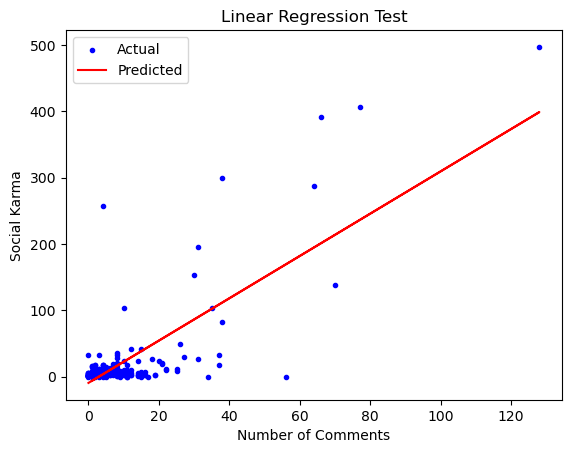

In [24]:
plt.scatter(X_test, y_test, color='blue', marker='.', label='Actual')
plt.xlabel('Number of Comments')
plt.ylabel('Social Karma')
plt.title('Linear Regression Test')
plt.plot(X_test, predictions, color='red', label='Predicted')
plt.legend()
plt.show()

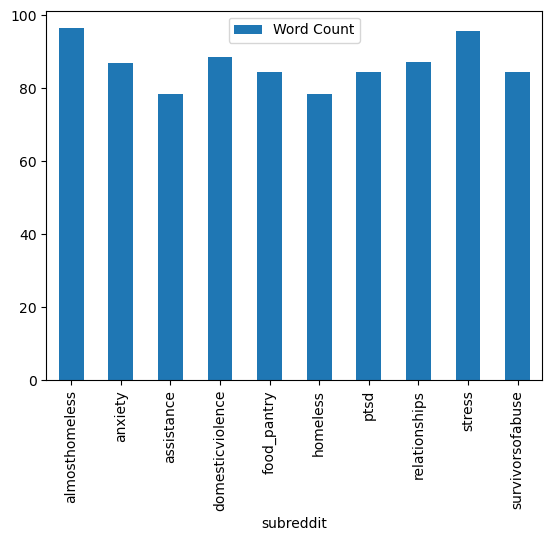

In [25]:
wc = df.pivot_table(values='Word Count', index='subreddit', aggfunc='mean')
wc2 = wc.plot(kind='bar', stacked=True)

In [26]:
df.pivot_table(values='post_id', index='subreddit', aggfunc='count')

,post_id
subreddit,
almosthomeless,19
anxiety,147
assistance,66
domesticviolence,72
food_pantry,6
homeless,52
ptsd,127
relationships,139
stress,14


<Axes: xlabel='subreddit'>

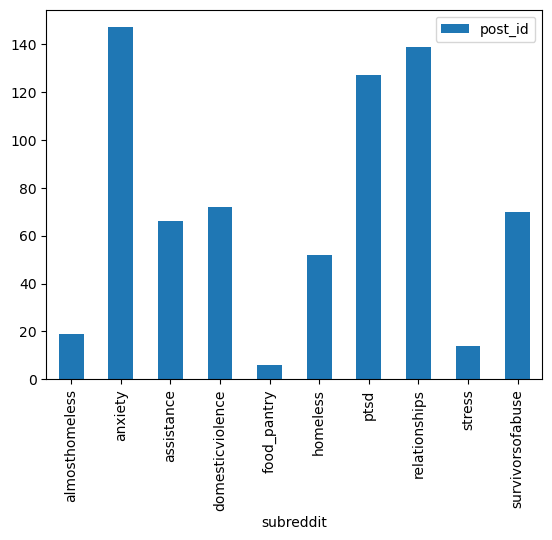

In [27]:
df.pivot_table(values='post_id', index='subreddit', aggfunc='count')
df2 = df.pivot_table(values='post_id', index='subreddit', aggfunc='count')
df2
df3 = df2.plot(kind='bar', stacked=True)
df3


In [ ]:
allTextList = df.text.to_list()
allText = ' '.join(allTextList)
allText


In [29]:
tokens = nltk.word_tokenize(allText)
tokens[:8]

['Its', 'like', 'that', ',', 'if', 'you', 'want', 'or']

In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelchambers/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
keepwords = [word for word in tokens if word not in stopwords]
keepwords


['Its',
 'like',
 ',',
 'want',
 'not.',
 '“',
 'ME',
 ':',
 'I',
 'problem',
 ',',
 'takes',
 'longer',
 '.',
 'But',
 'asked',
 'friend',
 'help',
 'let',
 'wait',
 'one',
 'hour',
 '’',
 'prepared',
 'anything',
 '.',
 'Thats',
 'asked',
 '.',
 'Instead',
 '3',
 'hours',
 ',',
 'helped',
 '10',
 'hours',
 'till',
 '5am',
 '...',
 'I',
 'man',
 'front',
 'desk',
 'title',
 'HR',
 'Customer',
 'Service',
 'Representative',
 '.',
 'About',
 '50',
 '%',
 'job',
 'spent',
 'onboarding',
 'new',
 'hires',
 '.',
 'Maybe',
 '10',
 '%',
 'clerical/paperwork',
 '.',
 'The',
 'rest',
 'dealing',
 'people',
 'walk',
 'need',
 'help',
 'benefits',
 ',',
 'retirement',
 ',',
 'etc',
 '.',
 'Although',
 'I',
 'required',
 'know',
 'basics',
 'benefits',
 'plans',
 'retirement',
 'pension',
 'benefits',
 'work',
 ',',
 'many',
 'employees',
 'questions',
 'beyond',
 'knowledge',
 'base',
 '.',
 'We',
 "'d",
 'saving',
 'much',
 'money',
 'new',
 'housr',
 '...',
 'expensive',
 'city',
 '....',
 'I'

In [ ]:
keepwords2 = [word for word in tokens if word.isalpha()]
keepwords2

In [ ]:
keepwords3 = [word.lower() for word in tokens if word.lower()]
keepwords3


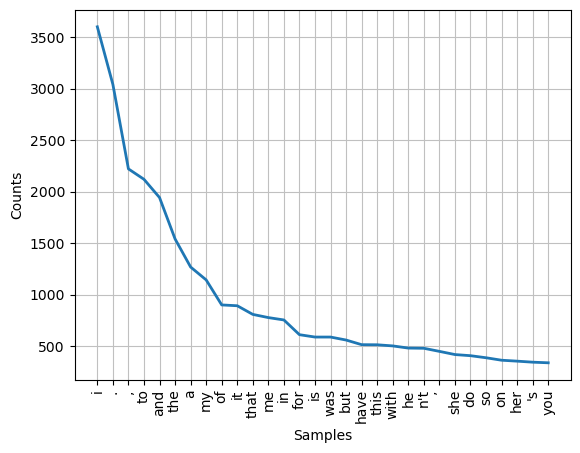

<Axes: xlabel='Samples', ylabel='Counts'>

In [34]:
from nltk import FreqDist
frequency = nltk.FreqDist(keepwords3)
frequency.plot(30)

<function matplotlib.pyplot.show(close=None, block=None)>

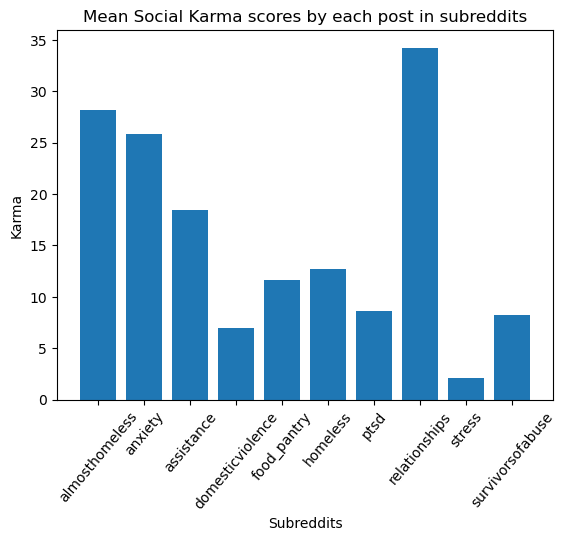

In [35]:
sk = df['subreddit']
sr = df['social_karma']
group = df.groupby('subreddit')['social_karma'].mean()
plt.title("Mean Social Karma scores by each post in subreddits")
plt.bar(group.index, group.values)
plt.ylabel('Karma')
plt.xlabel('Subreddits')
plt.xticks(rotation=50, ha='center')
plt.show


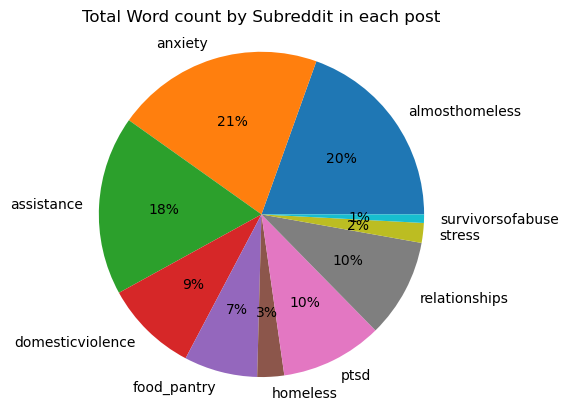

<Figure size 1900x800 with 0 Axes>

In [36]:
x = df['subreddit_id']
y = df['Word Count']
group = df.groupby('subreddit_id').size()
names = ['almosthomeless', 'anxiety', 'assistance', 'domesticviolence', 'food_pantry', 'homeless', 'ptsd', 'relationships', 'stress', 'survivorsofabuse']
plt.xticks(rotation=45)
plt.title("Total Word count by Subreddit in each post")
plt.pie(group, labels = names, autopct='%1.0f%%', radius = 1.1)
plt.figure(figsize=(19, 8))
plt.show()


In [37]:
get_ipython().system('pip install wordcloud')
from wordcloud import WordCloud

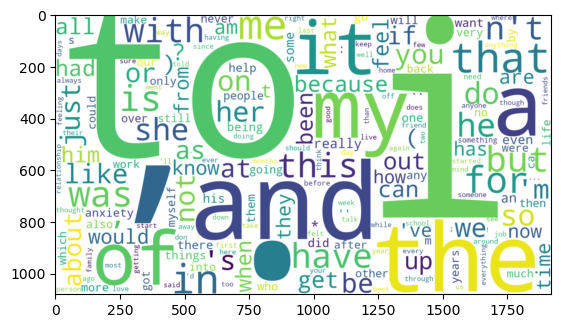

In [38]:
cloud = WordCloud(width=1920, height=1080, background_color = 'white').generate_from_frequencies(frequency)
plt.imshow(cloud, interpolation = 'bilinear')

<function matplotlib.pyplot.show(close=None, block=None)>

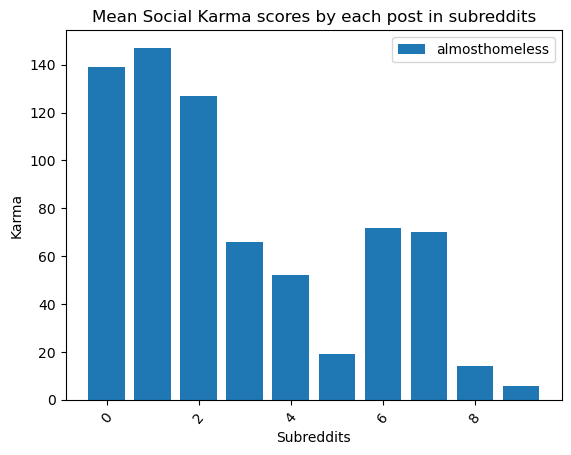

In [39]:
plt.title("Mean Social Karma scores by each post in subreddits")
plt.bar(group.index, group.values)
plt.ylabel('Karma')
plt.xlabel('Subreddits')
plt.xticks(rotation=50, ha='center')
plt.legend(names)
plt.show